## What animal is shown in the picture?
This program will try to give us the answer to what animal is shown in a picture. 
Initially this is built with a dataset containing cats and dogs, where cats are class 0 and dogs are class 1.
The way it is built should make it possible to add more types of animals and just give the animal a different class number.

## Imports

In [27]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras import optimizers
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score
import scipy
import os
from pathlib import Path

## Directories 
Get training images and validation images

In [28]:
train_dir = './train/'
test_dir = './val/'

## Prepare the images
Rescale and set class to binary. 
Do this for both training and validation directory

In [29]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(224,224),batch_size=5,class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir,target_size=(224,224),batch_size=5,class_mode='binary')

Found 275 images belonging to 2 classes.
Found 70 images belonging to 2 classes.


## Building the model
1. Build and summarize model
2. Compile
3. Fit

In [30]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu', input_shape=(224,224,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(learning_rate=1e-3), metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 batch_normalization_16 (Ba  (None, 222, 222, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 dropout_16 (Dropout)        (None, 111, 111, 32)      0         
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_17 (Ba  (None, 109, 109, 64)     

In [31]:
history = model.fit(train_generator, steps_per_epoch=train_generator.samples//10, epochs=10,validation_data=test_generator,validation_steps=test_generator.samples//10)

Epoch 1/10
27/27 [==============================] - 9s 286ms/step - loss: 1.3222 - accuracy: 0.5407 - val_loss: 3.8899 - val_accuracy: 0.5714
Epoch 2/10
27/27 [==============================] - 8s 279ms/step - loss: 1.0115 - accuracy: 0.6444 - val_loss: 1.6614 - val_accuracy: 0.6571
Epoch 3/10
27/27 [==============================] - 8s 283ms/step - loss: 0.8691 - accuracy: 0.6296 - val_loss: 5.8384 - val_accuracy: 0.6000
Epoch 4/10
27/27 [==============================] - 8s 278ms/step - loss: 0.9875 - accuracy: 0.6444 - val_loss: 1.1128 - val_accuracy: 0.6857
Epoch 5/10
27/27 [==============================] - 7s 271ms/step - loss: 0.8208 - accuracy: 0.6000 - val_loss: 0.8806 - val_accuracy: 0.5429
Epoch 6/10
27/27 [==============================] - 7s 267ms/step - loss: 0.6747 - accuracy: 0.6963 - val_loss: 0.7277 - val_accuracy: 0.6571
Epoch 7/10
27/27 [==============================] - 7s 267ms/step - loss: 0.8121 - accuracy: 0.7333 - val_loss: 0.9076 - val_accuracy: 0.4286
Epoch 

## Plot

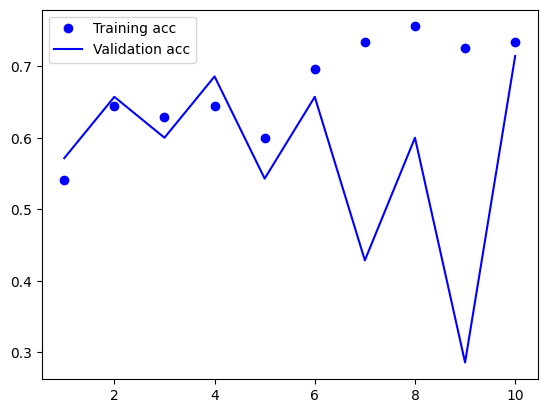

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.legend()



plt.show()

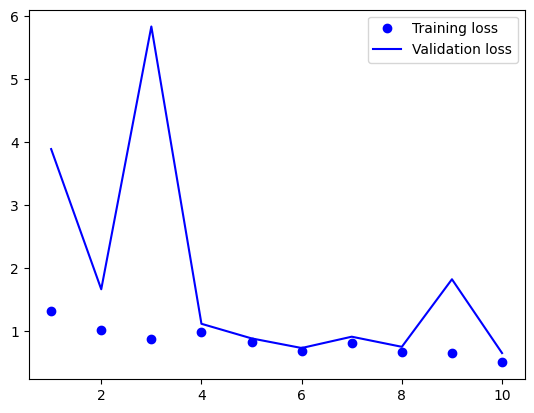

In [33]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.legend()

## Random select a image and write out the category of animal

val/dog/shiba_inu_132_jpg.rf.d78b9415e906d676483604c844a0c98c.jpg
dog


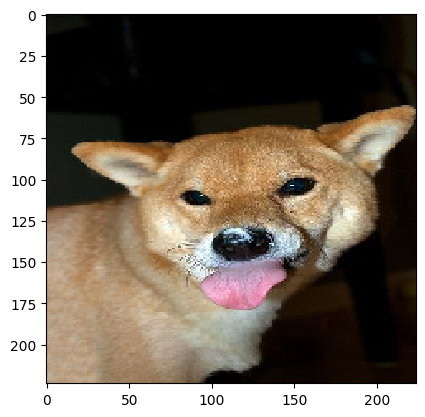

In [46]:
validation_file = pd.read_csv('val.csv')
df = pd.DataFrame(validation_file)
df = df[['image:FILE', 'category']]

test = df.sample()

for index, row in test.iterrows():
    filename = row['image:FILE']
    category = row['category']
    print(filename)
    if category == 0:
        print('cat')
    else:
        category == 1
        print('dog')    

img = image.load_img(filename,target_size=(224,224))
plt.imshow(img,interpolation='nearest')
plt.show()

## Reshape and make a prediction to see if we are correct

In [47]:
img_array = np.array(img)
img_array.shape

img_array=img_array.reshape(1,224,224,3)

a = model.predict(img_array)
if a==[[0]]:
    print('cat')
else:
    print('dog')

1/1 [==============================] - 0s 26ms/step
dog
